# 1D Speckle Generation & Analysis

**Scott Prahl**

**July 2021**

*If* `` pyspeckle `` *is not installed, uncomment the following cell (i.e., delete the initial #) and execute it with* `` shift-enter ``.  *Afterwards, you may need to restart the kernel/runtime before the module will import successfully.*"

In [1]:
#!pip install --user pyspeckle

In [2]:
import numpy as np
import matplotlib.pyplot as plt

try:
    import pyspeckle

except ModuleNotFoundError:
    print('pyspeckle is not installed. To install, uncomment and run the cell above.')
    print('Once installation is successful, rerun this cell again.')

## Exponential autocorrelation generation

Generate a speckle pattern with a specific average and standard deviation, but also with an exponentially decaying autocorrelation function.

### Validate basic uniform random number generation

Before starting with speckle, lets do explore a uniform random number distribution.

He we generate a uniform random number distribution with a specific average and standard deviation, but also with an exponentially decaying autocorrelation function.

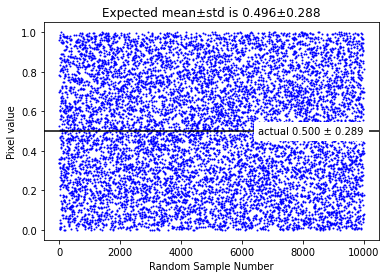

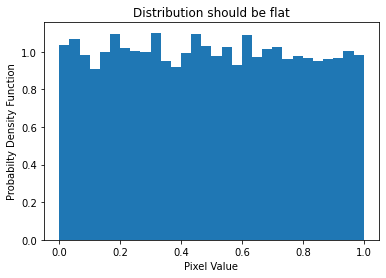

In [3]:
M=10000
expected_ave = 1/2
expected_std = (1-0)/np.sqrt(12)
y = np.random.random(M)


#calculated values from generated y values
ave = np.mean(y)
std = np.sqrt(np.var(y))

plt.plot(y,'ob',markersize=1)
plt.axhline(expected_ave, color='black')
plt.text(M, expected_ave, "actual %.3f ± %.3f"%(expected_ave,expected_std), ha='right', va='center', backgroundcolor="white")
plt.title("Expected mean±std is %.3f±%.3f" % (ave,std))
plt.xlabel('Random Sample Number')
plt.ylabel('Pixel value')
plt.show()


count, bins, ignored = plt.hist(y, 30, density=True)
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Distribution should be flat")
plt.show()

### Tests for average and standard deviation of the speckle

Here we just make sure that the average and standard deviation of the speckle array is correct.

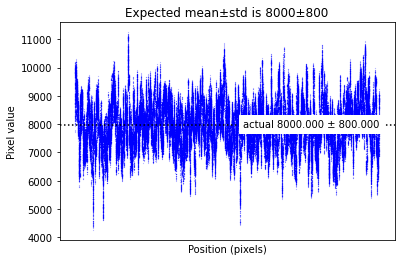

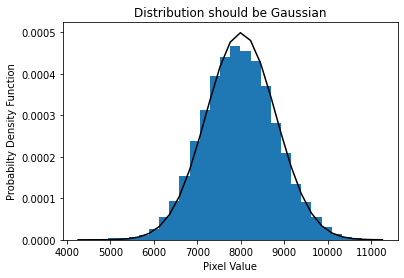

In [4]:
M     = 200000 # number of pixels in speckle realization
cl    = 300    # correlation length in pixels
expected_ave   = 8000   # average value of speckle
expected_std = 800    # standard deviation of pixel values

y = pyspeckle.create_exp_1D(M,expected_ave,expected_std,cl)

ave = np.mean(y)
std = np.sqrt(np.var(y))

plt.plot(y,'ob',markersize=0.1)
plt.axhline(ave, ls=':', color='black')
plt.text(M, expected_ave, "actual %.3f ± %.3f"%(expected_ave,expected_std), ha='right', va='center', backgroundcolor="white")
plt.title("Expected mean±std is %.0f±%0.f" % (expected_ave,expected_std))
plt.xlabel('Position (pixels)')
plt.ylabel('Pixel value')
plt.xticks([])
plt.show()

count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins,  1/(expected_std * np.sqrt(2 * np.pi)) * np.exp(-0.5*((bins-expected_ave)/expected_std)**2),'k')
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Distribution should be Gaussian")
plt.show()

Repeat for several 1D speckle realizations with different average values but the same standard deviation.

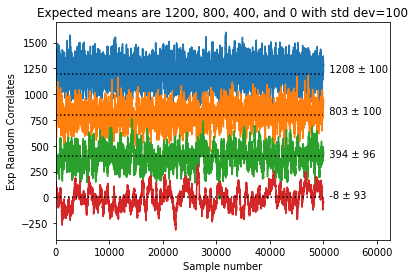

In [5]:
M=50000
expected_std=100

expected_ave=1200
y = pyspeckle.create_exp_1D(M,expected_ave,expected_std,20)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[expected_ave,expected_ave],':k')

expected_ave=800
y = pyspeckle.create_exp_1D(M,expected_ave,expected_std,50)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[expected_ave,expected_ave],':k')

expected_ave=400
y = pyspeckle.create_exp_1D(M,expected_ave,expected_std,100)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[expected_ave,expected_ave],':k')

expected_ave=0
y = pyspeckle.create_exp_1D(M,expected_ave,expected_std,500)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.annotate("  %.0f ± %.0f"%(ave,std),xy=(M,ave))
plt.plot(y)
plt.plot([0,M],[expected_ave,expected_ave],':k')

plt.xlim(0,M*1.25)
plt.title("Expected means are 1200, 800, 400, and 0 with std dev=%.0f" % expected_std)
plt.xlabel('Sample number')
plt.ylabel('Exp Random Correlates')
plt.show()

## Validate autocorrelation shape

The points should be distributed so that the autocorrelation is a decaying exponential

$$
\langle X,X\rangle = \exp\left(-\frac{x}{\tau}\right)
$$

This is normalized to unity when the offset is zero.

In [6]:
help(pyspeckle.autocorrelation)

Help on function autocorrelation in module pyspeckle.pyspeckle:

autocorrelation(x)
    Find the autocorrelation of a 1D array.
    
    This is a little different from the standard autocorrelation because
    (1) the mean is subtracted before correlation
    (2) the autocorrelation is normalized to maximum value
    (3) only the right hand side of the symmetric function is returned
    
    Args:
        x: 1D array
    
    Returns:
        autocorrelation array of same length



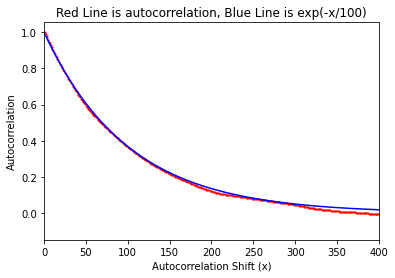

In [7]:
M= 100000
cl = 100

x = np.linspace(1,M+1,M)
y = pyspeckle.create_exp_1D(M,200,100,cl)

ac = pyspeckle.autocorrelation(y)
plt.plot(x,ac,'ro',markersize=1)

plt.xlim(0,4*cl)
plt.plot(x,np.exp(-x/cl),color='blue')

plt.title(r"Red Line is autocorrelation, Blue Line is exp(-x/%.0f)" % cl)
plt.xlabel('Autocorrelation Shift (x)')
plt.ylabel('Autocorrelation')

plt.show()

## Speckle with Gaussian autocorrelation

This seems to work nicely.  To match theory, the speckle realization should be much longer than the correlation length `cl` (perhaps by a factor of 50).

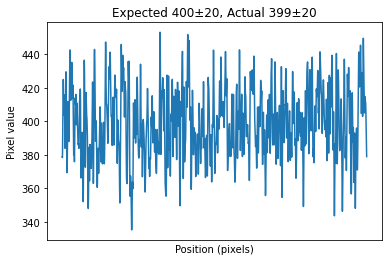

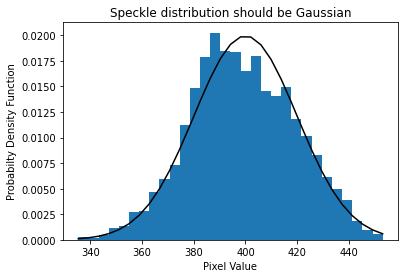

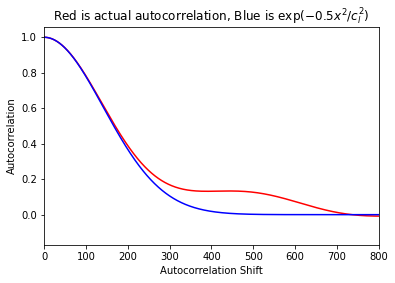

In [8]:
M=100000
x=np.linspace(0,M-1,M)
expected_std= 20
expected_ave = 400
cl = 200

y = pyspeckle.create_gaussian_1D(M,expected_ave,expected_std,cl)
ave = np.mean(y)
std = np.sqrt(np.var(y))
plt.plot(y)
plt.title("Expected %.0f±%0.f, Actual %.0f±%0.f" % (expected_ave,expected_std,ave,std))
plt.xlabel('Position (pixels)')
plt.ylabel('Pixel value')
plt.xticks([])
plt.show()

count, bins, ignored = plt.hist(y, 30, density=True)
plt.plot(bins,  1/(expected_std * np.sqrt(2 * np.pi)) * np.exp(-0.5*((bins-expected_ave)/expected_std)**2),'k')
plt.xlabel("Pixel Value")
plt.ylabel("Probabilty Density Function")
plt.title("Speckle distribution should be Gaussian")
plt.show()

ac = pyspeckle.autocorrelation(y)
plt.plot(x,ac,color='red')

plt.xlim(0,4*cl)
plt.plot(x,np.exp(-0.5*x**2/(cl**2/2)),color='blue')

plt.title(r"Red is actual autocorrelation, Blue is $\exp(-0.5x^2/c_l^2)$")
plt.xlabel('Autocorrelation Shift')
plt.ylabel('Autocorrelation')

plt.show()